# <center> Lab 3 Examples 
## <center>    Applications
    
Lab 3 is mostly about applications of integration in physics. From point of view of Jupyter, there isn't much new here. All you need is the things we already learned in the previous labs plus the theory from the class. 
    
In this Example file we will show how to create a parametrized family of functions and how to plot multiple plots at the same time. This will be needed for one of the problems.

**Video**: https://youtu.be/eUwDg2feZyM
    
Let's start with adding usual libraries.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from numpy.polynomial import *
sp.var('x')


x

### **Example 1.** Defining the family

Suppose we have a family of functions $f_n(x)=nxe^{-nx^2}$. The parameter $n$ is always going to be a positive integer. For each $n$, we will have a slightly different function. For example, $f_1(x)=xe^{-x^2}$, $f_2(x)=2xe^{-2x^2}$, etc. We can use SymPy to define all of these functions at the same time by treating $n$ as a variable that can take on only positive integer values:



In [2]:
sp.var('n', integer=True, positive=True, nonzero=True)
fn=n*x*sp.exp(-n*x**2)
fn

n*x*exp(-n*x**2)

Let's see some of these functions:

In [3]:
f2=fn.subs(n,2)
f2

2*x*exp(-2*x**2)

In [4]:
f2.subs(x,1)

2*exp(-2)

In [5]:
fn.subs([(n,1),(x,3)])   # here n=1 and x=3

3*exp(-9)

In [6]:
sp.N(fn.subs([(n,1),(x,3)]))  # don't forget about sp.N. It can be helpful

0.000370229412260039

Let's find a limit of $f_n(x)$ as $x$ goes to infinity. We can do it separately for each $n$ and look for pattern, or we can just find a general formula.
So, separately:

In [7]:
sp.limit(fn.subs(n,1), x, sp.oo)

0

In [8]:
sp.limit(fn.subs(n,2), x, sp.oo)

0

In [9]:
sp.limit(fn.subs(n,3), x, sp.oo)

0

As we can see, the limit seems to be always 0. So, we can guess that the limit equal to 0. We could have done this in one step:

In [10]:
sp.limit(fn,x,sp.oo)

0

### **Example 2.** Plotting

Next, let's try to plot first 6 functions at the same time, but on different plots. We will arange them in the 2 by 3 grid (2 rows and 3 columns). To create multiple plots, we can use subplots command. You should have seen it in the tutorial file before.

Another thing that we have to point out is that we need to lambdify the whole family as we did in other labs. We can either lambdify each part separatelly like so:

`f1n=sp.lambdify(x,fn.subs(n,1))`

`f2n=sp.lambdify(x,fn.subs(n,2))`
etc.

Or, we can do this to the whole family at once treating $n$ as another variable:

`fnn=sp.lambdify((n,x),fn)`

In [14]:
fnn=sp.lambdify((n,x),fn)   

In [15]:
fnn(2,1)   # this is f2(1)

0.2706705664732254

In [16]:
fnn(3,0.5)  # this is f3(0.5)

0.708549829111522

Now let's plot first 6 functions on the interval $[0,2]$. Keep note of how we create subplots:
`((ax1, ax2, ax3), (ax4, ax5,ax6))` this part defines axis of each subplot. Each  triple is a row, so we have two rows, each with 3 entries. This part has to be repeated on the other side of equal sign: `2,3`.

Next, `sharex=True, sharey=True` means all graphs will use the same scale for x-axis and y-axis. It is possible to share only one of those if needed.

Finally, we will also fill the area between the graph and x-axis by using `fill_between` command. The first entry there `xval` denote x-axis (as in between which x-values we have to fill), and the second entry (e.g. `fnn(1,xval)`) denotes the graph.

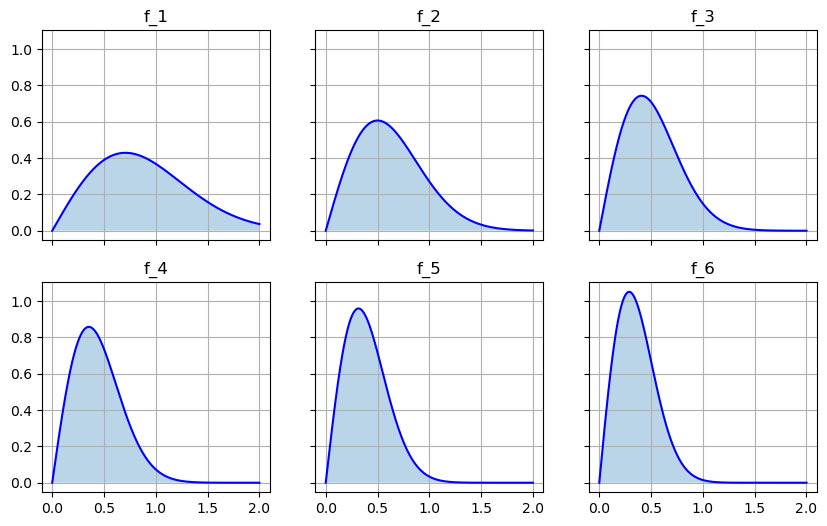

In [18]:
fig, ((ax1, ax2, ax3), (ax4, ax5,ax6)) = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10, 6))


xval=np.linspace(0,2,1000)


ax1.plot(xval,fnn(1,xval), color='blue')
ax1.fill_between(xval, fnn(1,xval), alpha=0.3)
ax1.grid()
ax1.title.set_text("f_1")

ax2.plot(xval,fnn(2,xval), color='blue')
ax2.fill_between(xval, fnn(2,xval), alpha=0.3)
ax2.grid()
ax2.title.set_text("f_2")

ax3.plot(xval,fnn(3,xval), color='blue')
ax3.fill_between(xval, fnn(3,xval), alpha=0.3)
ax3.grid()
ax3.title.set_text("f_3")

ax4.plot(xval,fnn(4,xval), color='blue')
ax4.fill_between(xval, fnn(4,xval), alpha=0.3)
ax4.grid()
ax4.title.set_text("f_4")

ax5.plot(xval,fnn(5,xval), color='blue')
ax5.fill_between(xval, fnn(5,xval), alpha=0.3)
ax5.grid()
ax5.title.set_text("f_5")

ax6.plot(xval,fnn(6,xval), color='blue')
ax6.fill_between(xval, fnn(6,xval), alpha=0.3)
ax6.grid()
ax6.title.set_text("f_6")

plt.show()

Note that we have repeated the same 4 lines of code 6 times. You may wonder if we can do better using loops. And we can! We can use `enumerate` to go over all axes while counting those axis. Note that `enumerate` goes over lists and since we have a 2 by 3 array of axes, we have to flatten in to a list. For that we use `.flat` method. Also, take a note of how we create our titles. Here `%i` means we are going to place an integer in that place, which is later defined to be `%(i+1)`.

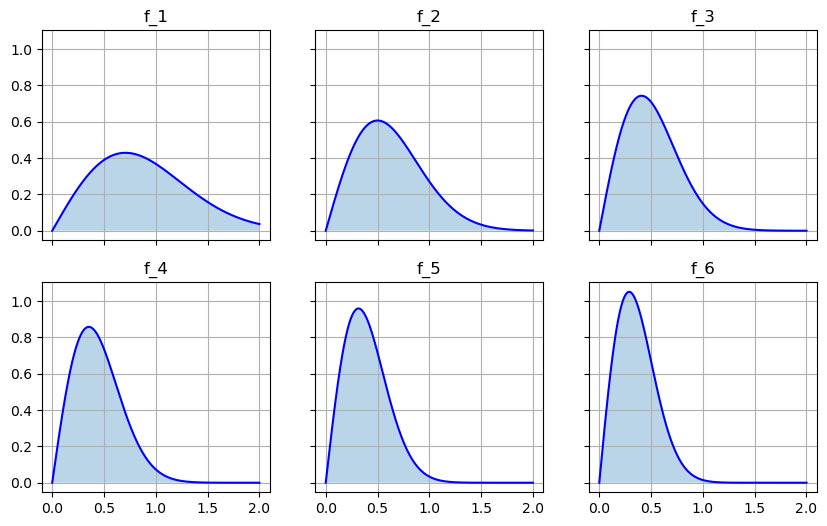

In [19]:
fig, axis = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(10, 6))

xval=np.linspace(0,2,1000)

for i, ax in enumerate(axis.flat):
    ax.plot(xval,fnn(i+1,xval), color='blue')
    ax.fill_between(xval, fnn(i+1,xval), alpha=0.3)
    ax.grid()
    ax.title.set_text("f_%i" %(i+1))

plt.show()

### **Example 3.** Example with integration

Now let's find the blue areas and see how it changes as $n$ gets larger. First seperately:

In [20]:
sp.N(sp.integrate(fn.subs(n,1),(x,0,2)))

0.490842180555633

In [21]:
sp.N(sp.integrate(fn.subs(n,2),(x,0,2)))

0.499832268686049

In [22]:
sp.N(sp.integrate(fn.subs(n,3),(x,0,2)))

0.499996927893823

As we can see, the integral seems to be approaching to 0.5. Let's confirm it by using general formula:

In [23]:
area=sp.integrate(fn,(x,0,2))
area

1/2 - exp(-4*n)/2

And if we take the limit of it as $n$ goes to infinity:

In [24]:
sp.limit(area,n,sp.oo)

1/2

### **Example 4.** Example with differentiation

Let's find the coordinate for the maximum of all of the function in the family that we see on the graph. We will do it for a general formula and then also take a limit.

In [25]:
der_fn=fn.diff(x)
der_fn

-2*n**2*x**2*exp(-n*x**2) + n*exp(-n*x**2)

In [26]:
sp.solveset(der_fn,x)

{-sqrt(2)/(2*sqrt(n)), sqrt(2)/(2*sqrt(n))}

We can see, that we have two critical points. The one we see on the graph is the positive one.

In [27]:
crit_n=sp.sqrt(2)/(2*sp.sqrt(n))
crit_n

sqrt(2)/(2*sqrt(n))

In [28]:
value_n=fn.subs(x,crit_n)
value_n

sqrt(2)*sqrt(n)*exp(-1/2)/2

Let's list first 3 coordinates. Let's use print command to make a nice statements:

In [29]:
print('Maximum of f_1 is at (',sp.N(crit_n.subs(n,1)),',',sp.N(value_n.subs(n,1)),')')
print('Maximum of f_2 is at (',sp.N(crit_n.subs(n,2)),',',sp.N(value_n.subs(n,2)),')')
print('Maximum of f_3 is at (',sp.N(crit_n.subs(n,3)),',',sp.N(value_n.subs(n,3)),')')

Maximum of f_1 is at ( 0.707106781186548 , 0.428881942480353 )
Maximum of f_2 is at ( 0.500000000000000 , 0.606530659712633 )
Maximum of f_3 is at ( 0.408248290463863 , 0.742845314824805 )


FInally, let's find where does this extrema approaches as n gets larger

In [30]:
crit_inf=sp.limit(crit_n, n, sp.oo)
value_inf=sp.limit(value_n, n, sp.oo)

print('As n gets larger, the coordinate of the extrema goes to (',crit_inf, ',', value_inf,')')

As n gets larger, the coordinate of the extrema goes to ( 0 , oo )
